# Week 2 - Project 1
###### Team 5 - Sanjivek & Georgia

### Goal: Identify and load a network dataset (that has categorical information per node). For each of the nodes , calculate degree centrality and eigenvector centrality. Compare centrality measures across categorical groups.

#### Books About US Politics: A network of books about US politics published around the time of the 2004 presidential election and sold by the online bookseller Amazon.com. Edges between books represent frequent copurchasing of books by the same buyers. The network was compiled by V. Krebs and is unpublished, but can found on Krebs' web site. Thanks to Valdis Krebs for permission to post these data on this web site. 

##### Import data

In [50]:
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
L = nx.read_gml('polbooks.gml',relabel=True)
L

##### Print Nodes and Edges

In [52]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 105
Edges: 441


##### With 105 nodes and 441 edges, let's draw a network graph using spring layout 

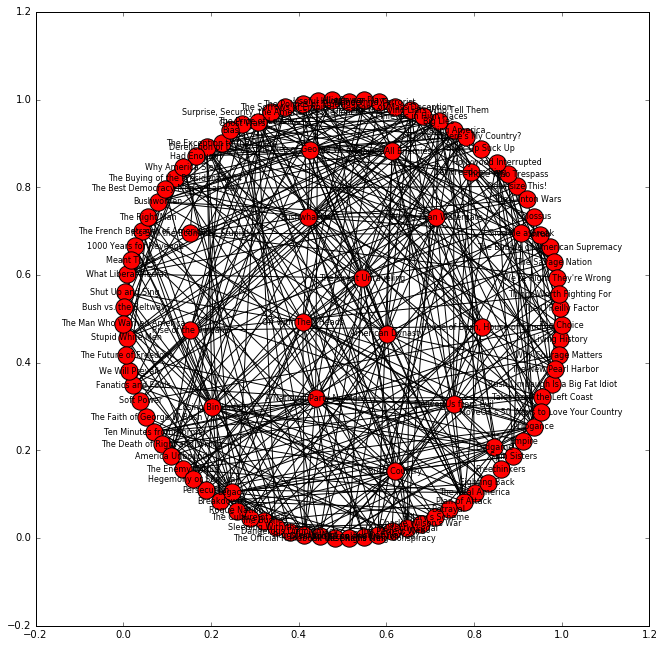

In [53]:
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L, scale=1.0, k=5*default_distance_between_nodes)
nx.draw_networkx(L, pos, node_size=300, font_size=8)

##### Calculate Degree of Centrality for books and print out a top 10 list

In [54]:
def sorted_map(map):
    ms= sorted(map.iteritems(),key=lambda(k,v):(-v,k))
    return ms

In [55]:
#Compute Degree Of Centrality
d = nx.degree(L)
ds = sorted_map(d)
ds[0:9]

[(u'A National Party No More', 25),
 (u'Off with Their Heads', 25),
 (u'Bushwhacked', 23),
 (u'Losing Bin Laden', 23),
 (u'American Dynasty', 22),
 (u'Big Lies', 21),
 (u'The Great Unraveling', 21),
 (u'The Price of Loyalty', 20),
 (u'Arrogance', 18)]

##### Log graph of the top 10 degree centrality books

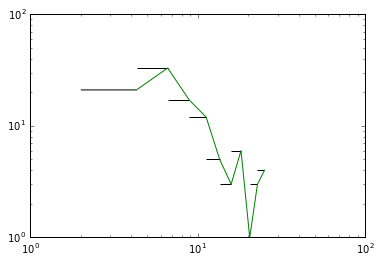

In [56]:
h= plt.hist(d.values(),10)
plt.loglog(h[1][1:],h[0])

###### Return a new graph object that contains the network with pendant and isolated nodes removed

In [57]:
#Function to remove isolated nodes
def trim_degrees(L,degree=1):
    L2=L.copy()
    d=nx.degree(L2)
    for n in L2.nodes():
            if d[n]<=degree: L2.remove_node(n)
    return L2

In [58]:
core = trim_degrees(L)
len(core)

105

In [59]:
core2 = trim_degrees(L,degree=2)
len(core2)

104

In [60]:
core3=trim_degrees(L,degree=3)
len(core3)

98

In [61]:
core4=trim_degrees(L,degree=4)
len(core4)

84

In [62]:
core5=trim_degrees(L,degree=5)
len(core5)

62

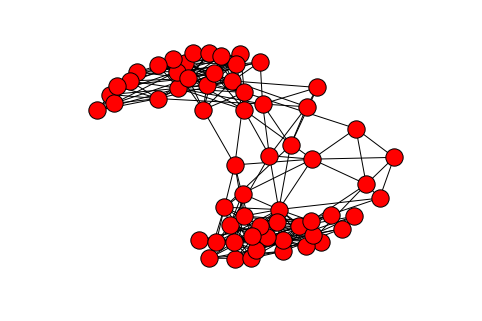

In [63]:
nx.draw(core5)

##### Calculate Closeness Centrality and print out a top 10 list

In [64]:
#Use the core5 grapgh network as a trimmed and optimized dataset to calculate the closeness centrality
c=nx.closeness_centrality(core5)
cs=sorted_map(c)
cs[:10]

[(u'Ghost Wars', 0.4357142857142857),
 (u'Rise of the Vulcans', 0.4357142857142857),
 (u'The Bushes', 0.4357142857142857),
 (u'Bush Country', 0.4295774647887324),
 (u'The Price of Loyalty', 0.4295774647887324),
 (u"Rumsfeld's War", 0.41496598639455784),
 (u'American Dynasty', 0.4066666666666667),
 (u'House of Bush, House of Saud', 0.4066666666666667),
 (u'Plan of Attack', 0.4066666666666667),
 (u'Sleeping With the Devil', 0.40131578947368424)]

##### Log graph of the top 10 closeness centrality books

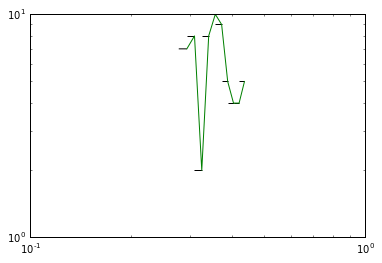

In [65]:
h=plt.hist(c.values(),10)
plt.loglog(h[1][1:],h[0])

##### Calculate Betweenness Centrality for books and print out a top 10 list

In [66]:
b = nx.betweenness_centrality(L)
bs = sorted_map(b)
bs[:10]

[(u'The Price of Loyalty', 0.13947827864287202),
 (u'The Bushes', 0.10364920953531939),
 (u'Bush Country', 0.0983949072276391),
 (u'Off with Their Heads', 0.09526168061799924),
 (u'American Dynasty', 0.09093422527408514),
 (u'Plan of Attack', 0.08030200829197108),
 (u'Losing Bin Laden', 0.07609290805120639),
 (u'Rise of the Vulcans', 0.07527175636235366),
 (u'A National Party No More', 0.0749076042480461),
 (u'Ghost Wars', 0.06872446488084949)]

##### Log graph of the top 10 betweenness centrality books

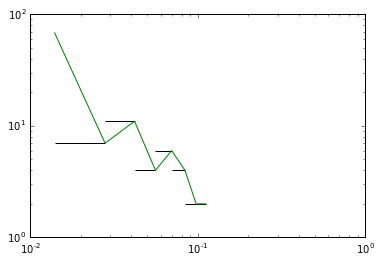

In [77]:
h=plt.hist(b.values(),10)
plt.loglog(h[1][1:],h[0])

##### Combine the three types of centralities and create a list of the most "central" books along with their centrality values

In [68]:
names1= [x[0] for x in ds[:10]]
names2= [x[0] for x in cs[:10]]
names3= [x[0] for x in bs[:10]]

In [69]:
names= list(set(names1)|set(names2)|set(names3))

In [70]:
table= [[name,d[name],c[name],b[name]] for name in names]

In [71]:
table

[[u'Off with Their Heads', 25, 0.37888198757763975, 0.09526168061799924],
 [u'The Price of Loyalty', 20, 0.4295774647887324, 0.13947827864287202],
 [u'Arrogance', 18, 0.35260115606936415, 0.02773067602170457],
 [u'American Dynasty', 22, 0.4066666666666667, 0.09093422527408514],
 [u'Big Lies', 21, 0.3696969696969697, 0.043197926647700245],
 [u'Ghost Wars', 8, 0.4357142857142857, 0.06872446488084949],
 [u'The Bushes', 8, 0.4357142857142857, 0.10364920953531939],
 [u'Deliver Us from Evil', 18, 0.3446327683615819, 0.04623512504605777],
 [u'Plan of Attack', 13, 0.4066666666666667, 0.08030200829197108],
 [u'Bush Country', 16, 0.4295774647887324, 0.0983949072276391],
 [u'A National Party No More', 25, 0.3836477987421384, 0.0749076042480461],
 [u'Bushwhacked', 23, 0.3719512195121951, 0.05789950024330003],
 [u'Sleeping With the Devil', 8, 0.40131578947368424, 0.06292846885423589],
 [u"Rumsfeld's War", 9, 0.41496598639455784, 0.058842720843820556],
 [u'The Great Unraveling', 21, 0.36969696969696

##### Calculate Eigenvecture Centrality

In [76]:
e = nx.eigenvector_centrality_numpy(L)
evc = sorted_map(e)
evc[:10]

[(u'Bushwhacked', 0.2969464588284694),
 (u'Big Lies', 0.2841351949839616),
 (u'American Dynasty', 0.2708379662597594),
 (u'The Price of Loyalty', 0.2585939688672186),
 (u'The Great Unraveling', 0.2548860262792035),
 (u'The Lies of George W. Bush', 0.24194952581413204),
 (u'Worse Than Watergate', 0.2375984828347787),
 (u'Plan of Attack', 0.19818504578342744),
 (u'Lies and the Lying Liars Who Tell Them', 0.1892355832780657),
 (u'Against All Enemies', 0.18672615228916498)]

##### Compare centrality measures across categorical groups (instead of a t-test, we do ANOVA b/c there are three categorical variables we are testing for: "N", "L" and "C")

###### Create a table that includes the centrality degrees (eigenvector, betweenness, closeness and degree) and the category (n, l, c) 

##### Run the one-way ANOVA test (for each centrality degree, that means 4 tests)

##### Determine if the p-value is higher/lower than 0.05 for each test